In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [19]:
data = pd.read_csv('./data/voiceDataSet.xls')
data.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

meanfreq: средняя частота голоса (в кГц)
sd: стандартное отклонение частоты голоса
median: медианная частота (в кГц)
Q25: значение в первом квартиле (в кГц)
Q75: значение в третьем квартиле (в кГц)
IQR: интерквартильный размах (в кГц)
skew: ассиметрия
kurt: эксцесс
sp.ent: спектральная энтропия
sfm: энтропия Винера
mode: мода частоты
centroid: частотный центроид
meanfun: средняя основная частота, измеренная по акустическому сигналу
minfun:  минимальная основная частота, измеренная по акустическому сигналу
maxfun: максимальная основная частота, измеренная в акустическом сигнале
meandom: среднее значение доминирующей частоты, измеренной по акустическому сигналу
mindom: минимум доминирующей частоты, измеренной в акустическом сигнале
maxdom: максимум доминирующей частоты, измеренной в акустическом сигнале
dfrange: диапазон доминантных частот, измеренное на звуковой сигнал
modindx: индекс модуляции голоса


<AxesSubplot:xlabel='label', ylabel='count'>

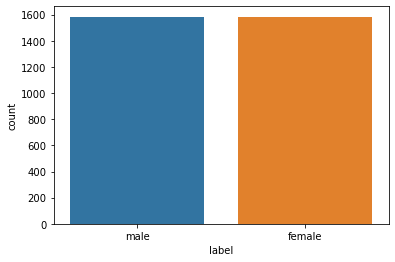

In [4]:
sns.countplot(x='label', data=data)

In [5]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

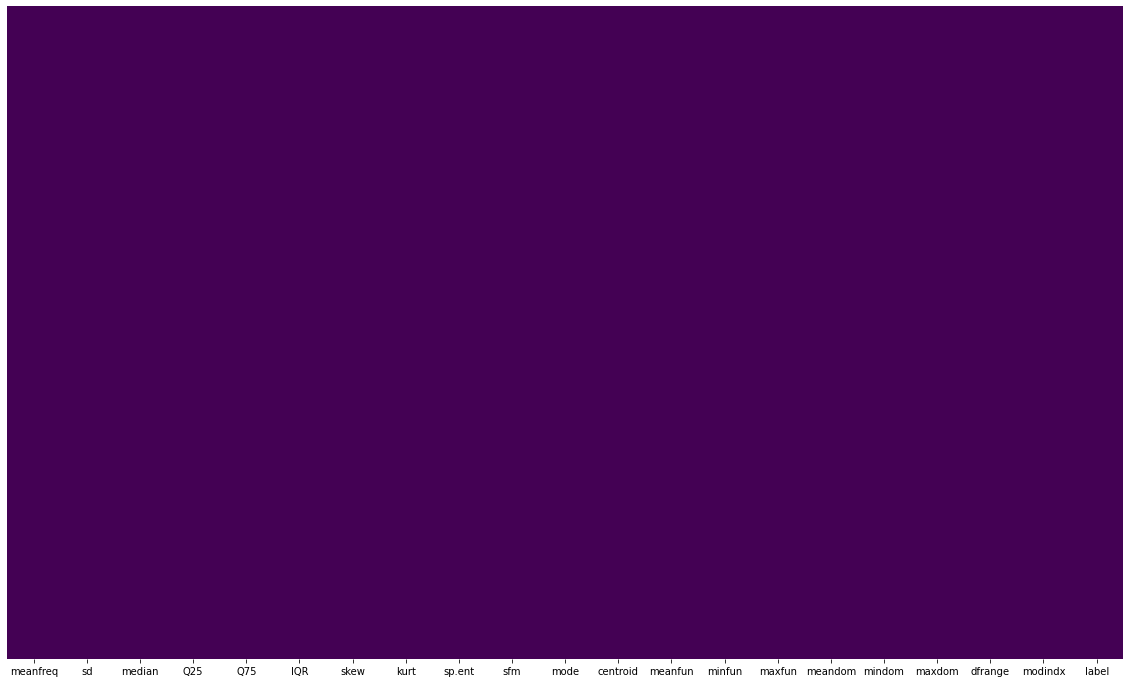

In [6]:
fix, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

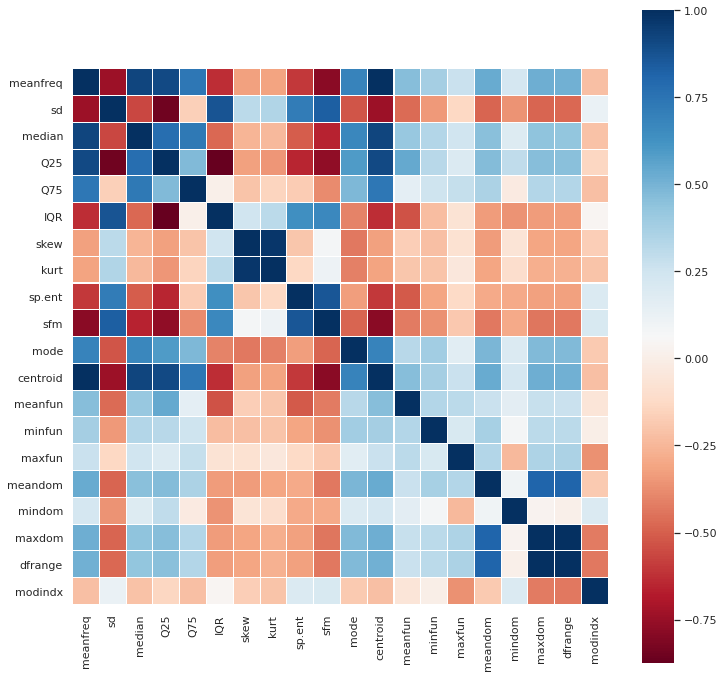

In [7]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=False, fmt=".1f", linewidths=0.1, cmap="RdBu")

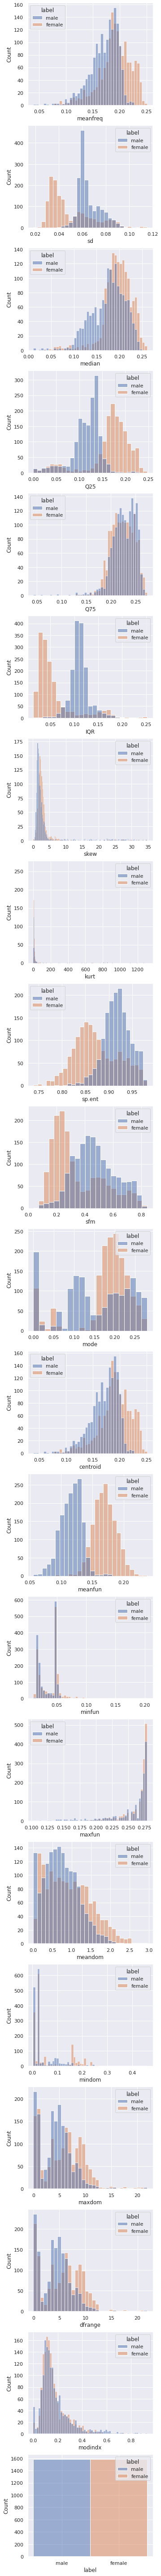

In [8]:
fig, axes = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(5,5*len(data.columns)))
for i,column in enumerate(data.columns):
    sns.histplot(data,x=column, hue='label', ax=axes[i], legend=True,)

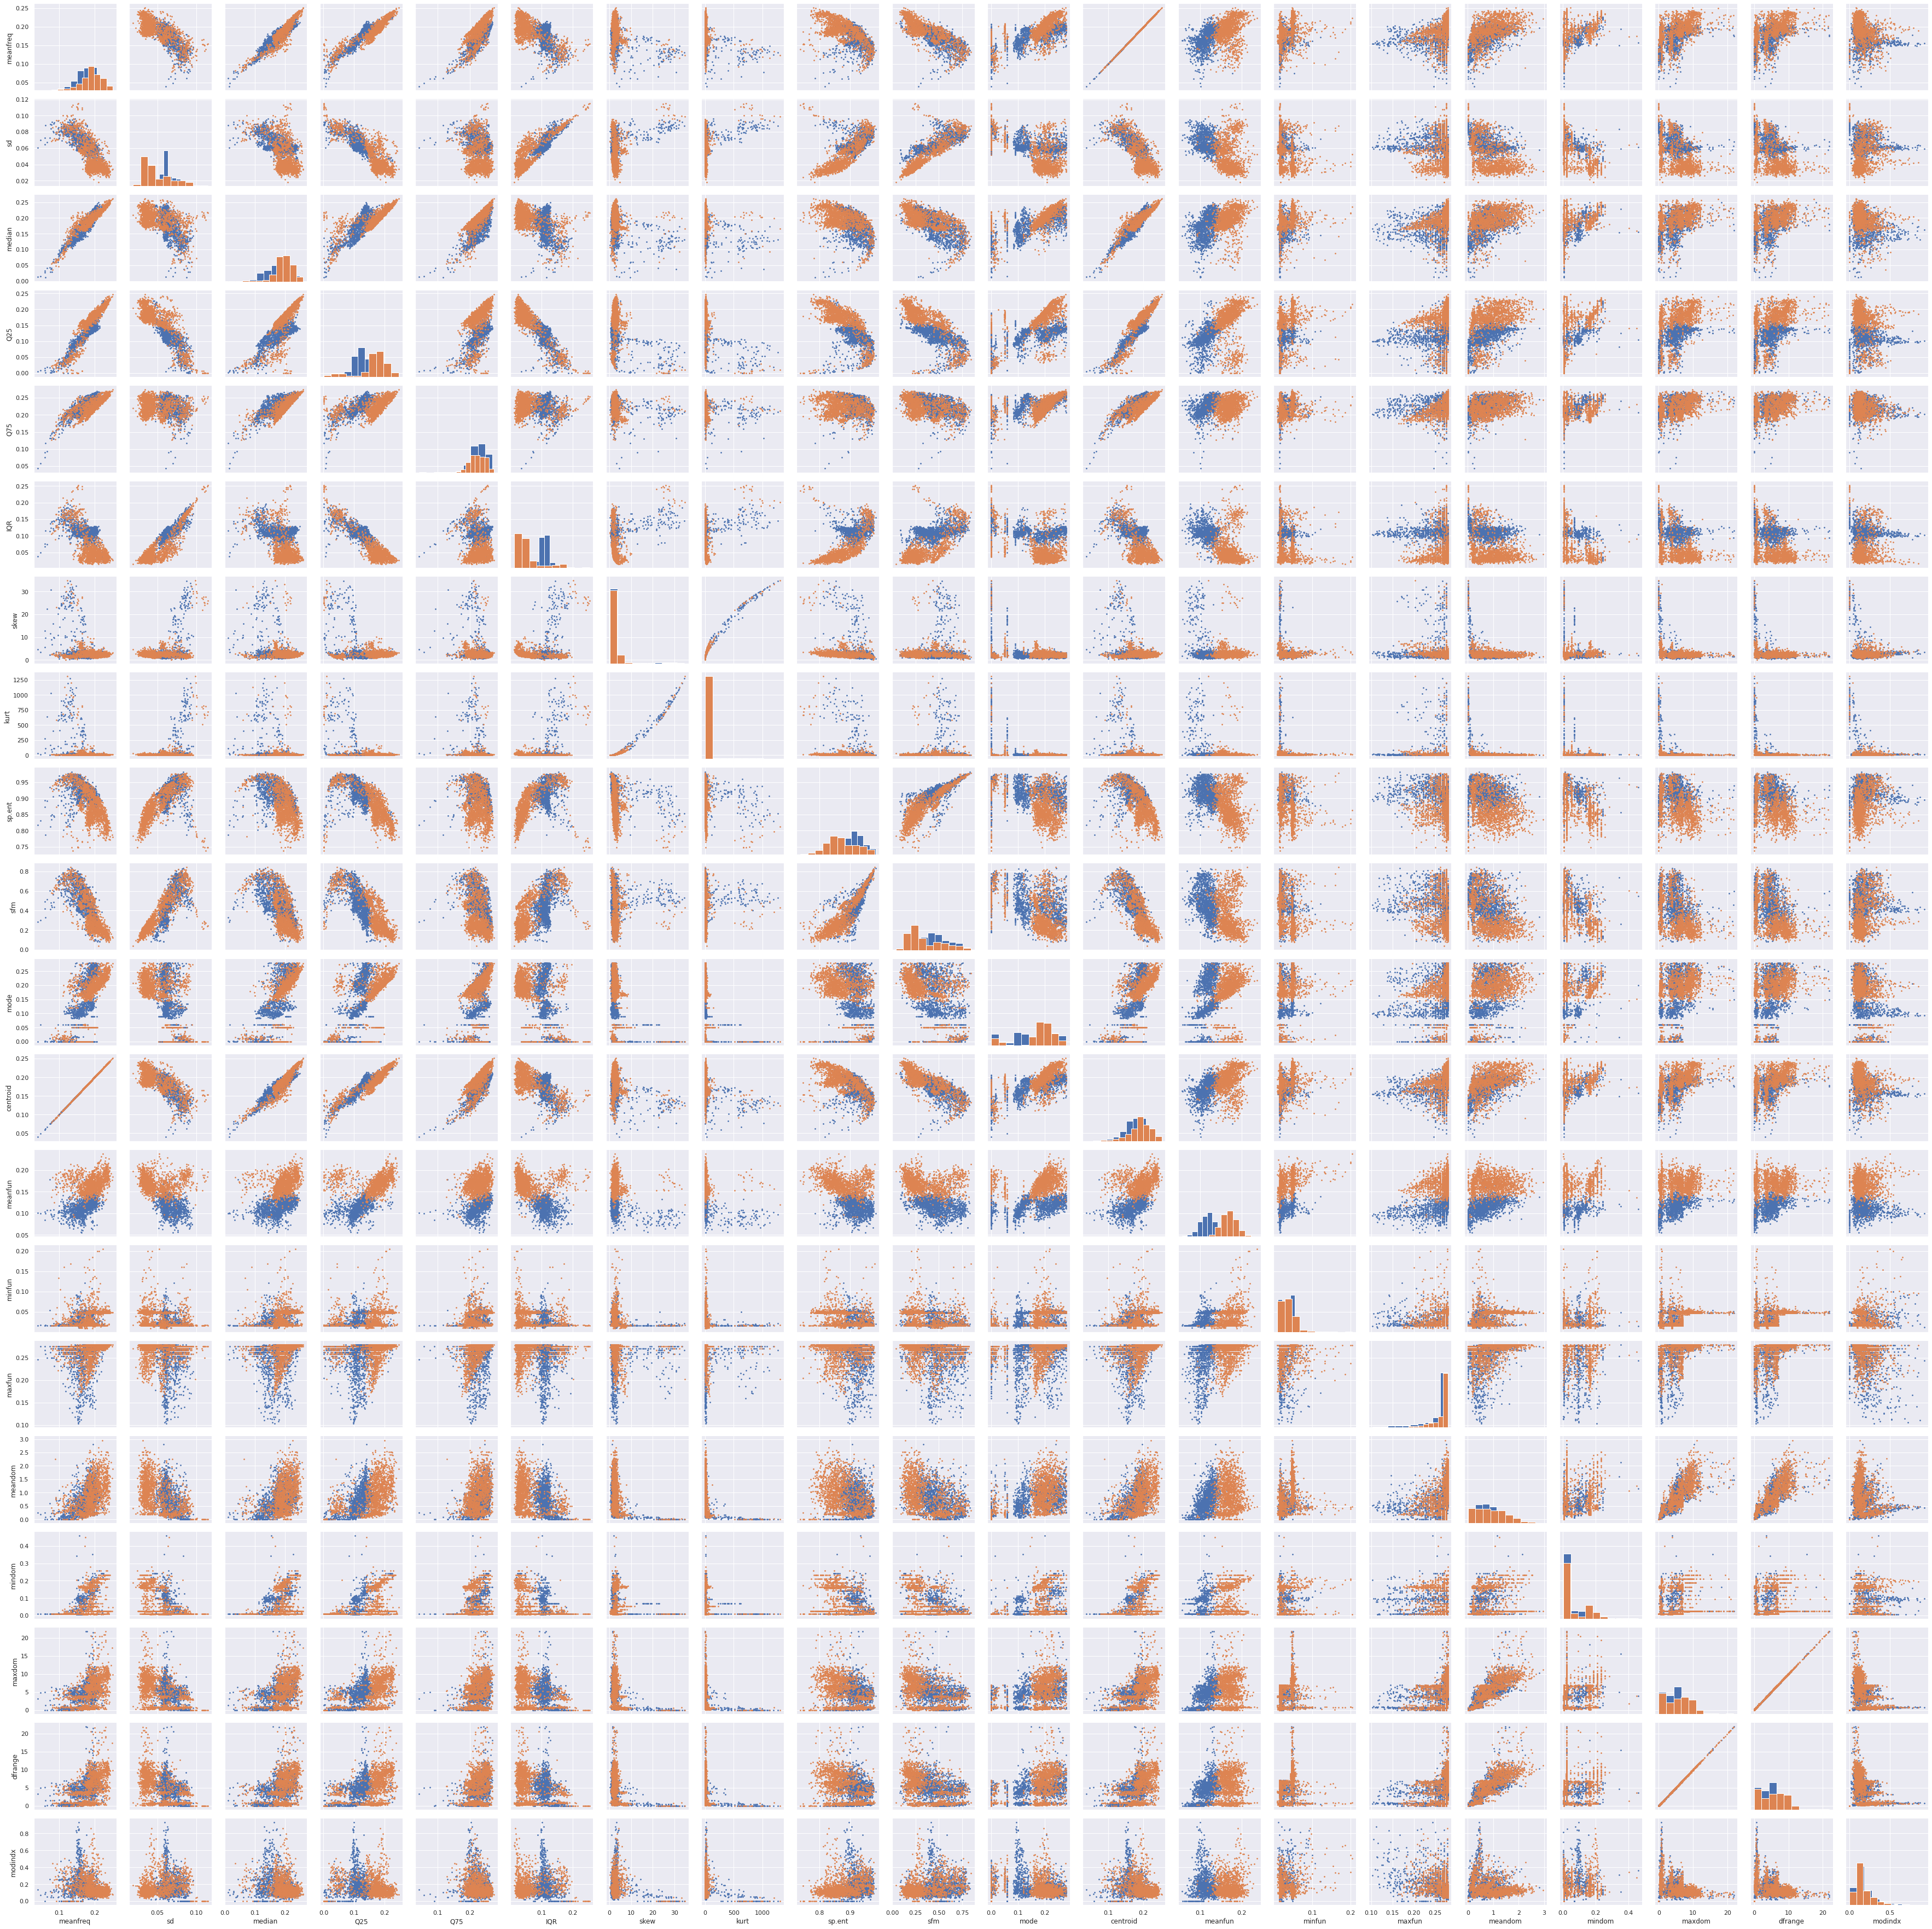

In [58]:
g = sns.PairGrid(data, hue='label' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

In [20]:
sex_dict = {'male':0, 'female':1}
data.label = data.label.replace(to_replace=sex_dict)
data = data.dropna()

In [50]:
X = data[['meanfreq', 'Q25', 'sd','IQR','sp.ent','mode', 'meanfun']]
y = data['label']

In [67]:
X = data.drop(columns='label')
y = data['label']

<AxesSubplot:>

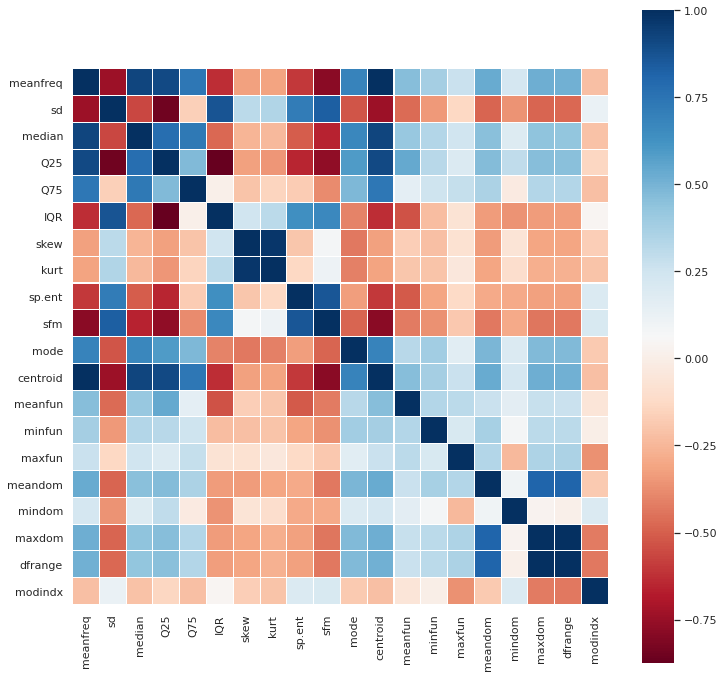

In [61]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(X.corr(), square=True,
              annot=False, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
y_pred_train = clf.predict(X_train_scaled)

print("Правильность на обучающем наборе: {:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Правильность на тестовом наборе: {:.3f}".format(accuracy_score(y_test, y_pred)))

print('[valid] F1-score = {:.3f}'.format(f1_score(y_test, y_pred)))

Правильность на обучающем наборе: 0.975
Правильность на тестовом наборе: 0.973
[valid] F1-score = 0.971


In [56]:
confusion_matrix(y_test, y_pred)

array([[  0,   0],
       [ 61, 890]])

In [37]:
def roc_auc_plot(y_true, y_pred_proba):
    '''
    Функция считает AUC и отрисовывает ROC кривую:
        y_true - истинное значение класса
        y_pred_proba - предсказанная вероятность класса [:, 1]
    '''
    # Посчитать значения ROC кривой и значение площади под кривой AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure()
    plt.plot([0, 1], label='Baseline', linestyle='--')
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
    plt.title('ROC AUC = %0.3f' % roc_auc, fontsize=15)
    plt.xlabel('False positive rate (FPR)', fontsize=15)
    plt.ylabel('True positive rate (TPR)', fontsize=15)
    plt.legend(fontsize=15, loc = 'lower right')

In [38]:
y_pred_proba = clf.predict_proba(X_test_scaled)[:,1]
roc_auc_plot(y_test,y_pred_proba)

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:941: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [39]:
from sklearn.model_selection import cross_validate
clf = LogisticRegression(random_state=42)
cv_metrics = cross_validate(clf, X, y, cv=5, scoring='f1_micro', return_train_score=True)

def plot_cv_metrics(cv_metrics):
    avg_f1_train, std_f1_train = cv_metrics['train_score'].mean(), cv_metrics['train_score'].std()
    avg_f1_valid, std_f1_valid = cv_metrics['test_score'].mean(), cv_metrics['test_score'].std()
    print('[train] F1-score = {:.2f} +/- {:.2f}'.format(avg_f1_train, std_f1_train))
    print('[valid] F1-score = {:.2f} +/- {:.2f}'.format(avg_f1_valid, std_f1_valid))
    
    plt.figure(figsize=(15, 5))

    plt.plot(cv_metrics['train_score'], label='train', marker='.')
    plt.plot(cv_metrics['test_score'], label='valid', marker='.')

    plt.ylim([0., 1.]);
    plt.xlabel('CV iteration', fontsize=15)
    plt.ylabel('F1-score', fontsize=15)
    plt.legend(fontsize=15)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[train] F1-score = 0.90 +/- 0.01
[valid] F1-score = 0.86 +/- 0.08


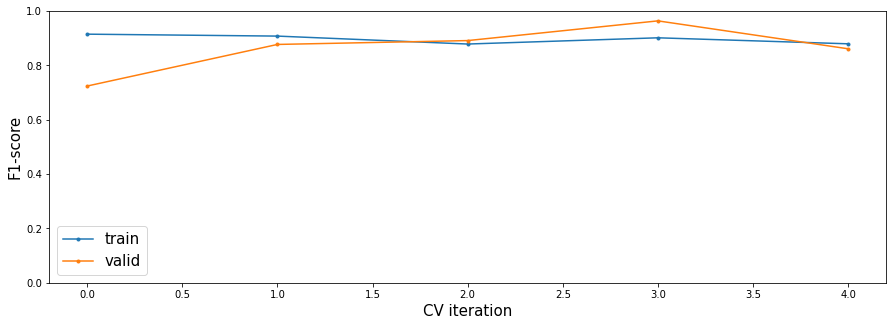

In [40]:
plot_cv_metrics(cv_metrics)

In [41]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [63]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
best_chi2_feature_names = list(featureScores.nlargest(10,'Score')['Specs'])

In [64]:
best_chi2_feature_names

['kurt',
 'maxdom',
 'dfrange',
 'meandom',
 'sfm',
 'IQR',
 'skew',
 'meanfun',
 'Q25',
 'mindom']

In [66]:
X = data[['kurt',
 'maxdom',
 'dfrange',
 'meandom',
 'sfm',
 'IQR',
 'skew',
 'meanfun',
 'Q25',
 'mindom']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
y_pred_train = clf.predict(X_train_scaled)

print("Правильность на обучающем наборе: {:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Правильность на тестовом наборе: {:.3f}".format(accuracy_score(y_test, y_pred)))

print('[valid] F1-score = {:.3f}'.format(f1_score(y_test, y_pred)))

Правильность на обучающем наборе: 0.972
Правильность на тестовом наборе: 0.972
[valid] F1-score = 0.970
